# Homework 9

Using the successive over relaxation method, find the gravitational potential for a line source with rho = 1 at x=50, y=50 and rho = 0 everywhere else. 

Show that the radial dependence of this source is modeled by: 

# V(r) = 2*G * mu * ln(r) + c

where G and mu are unity.

Initializing


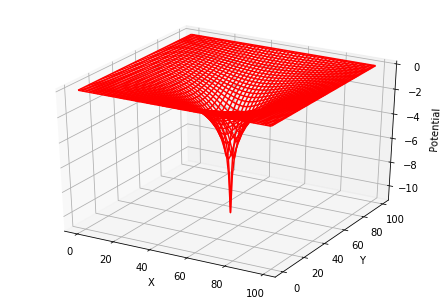

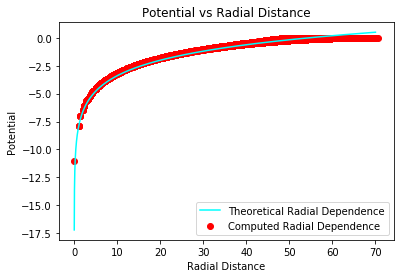

In [3]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float); rho = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  
    V[k,0] = 0 
    V[0,k] = 0                        # assume 0 potential at edges for the sake of constant potential.
    
for k in range(0, Nmax):              # here i set the density requirement 1 at (50,50) and 0 everywhere else
    for j in range(0, Nmax): 
        if k == 50 and j == 50: 
            rho[j,k] = 1
        else: rho[j,k] = 0
    
for iter in range(Niter):                                  

    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j] - pi*rho[i,j] #i had to add the constant term 
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
            
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()

p.scatter(sqrt((X-50)*(X-50) + (Y-50)*(Y-50)),Z, color='r', label='Computed Radial Dependence')      # since i want to see the radial dependence on potential, i've plotted the distance of any position(x,y) from (50,50) and tracked the potential at each (x,y) 

r = arange(0.01,70.01,0.01)            # after seeing what the V vs r graph looked like, I chose a new r to be the suitable range
#p.plot(r,2*log(r))                     # here I let G = 1 and mu = 1 as designed by the problem
#p.plot(r,2*log(r) - 9)                 # several plots were made to find the one that fit best (constant = 8)
p.plot(r,2*log(r) - 8,color='cyan',label='Theoretical Radial Dependence')
p.title('Potential vs Radial Distance')
p.xlabel('Radial Distance')
p.ylabel('Potential')
p.legend()
p.show()

# As can be seen above, the theoretical equation with c = 8 overlaps very well with the calculated values. 